In [1]:
def getDensity(data, PCX, PCY, bins, sigma=1):
#     np.seterr(divide = 'ignore') 
    h, xe, ye = np.histogram2d(data[:, PCX], data[:, PCY], bins=bins, density=True)
    lh = np.log(h)
    lhmax = np.max((lh))
    lh -= lhmax
    lhmin = np.min((lh[lh != -np.inf]))
    lh[lh == -np.inf] = lhmin
    scipy.ndimage.gaussian_filter(lh, sigma=sigma, order=0, output=lh)
    X = getRanges(xe)
    Y = getRanges(ye)
    return lh.T, X, Y, lhmin
def getRanges(interval):
    return (interval[:-1] + interval[1:]) / 2

In [2]:
import numpy as np
import numpy
import scipy
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})


In [77]:
lf = "/home/mattia/Desktop/Fracture/tests_mattia/Cu/NPT_tensile/test_01/remapX_1dt/planeSlip/LENS_normalized.npy"
sf = "/home/mattia/Desktop/Fracture/tests_mattia/Cu/NPT_tensile/test_01/remapX_1dt/planeSlip/tSOAP_normalized_SMOOTH.npy"

In [78]:
tSOAP = np.load(sf)
LENS = np.load(lf)

print(np.shape(tSOAP),np.shape(LENS))

(2744, 80) (2744, 80)


In [79]:
djoint_d = np.dstack((np.transpose(tSOAP),np.transpose(LENS)))

In [80]:
signal_joint_fl = np.array(djoint_d).reshape(np.shape(djoint_d)[0]*np.shape(djoint_d)[1],np.shape(djoint_d)[2])

In [81]:
signal_joint_fl.shape

(219520, 2)

/tmp/ipykernel_17080/2531458372.py:4: RuntimeWarning: divide by zero encountered in log
  lh = np.log(h)
/tmp/ipykernel_17080/3234223551.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
/tmp/ipykernel_17080/3234223551.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])


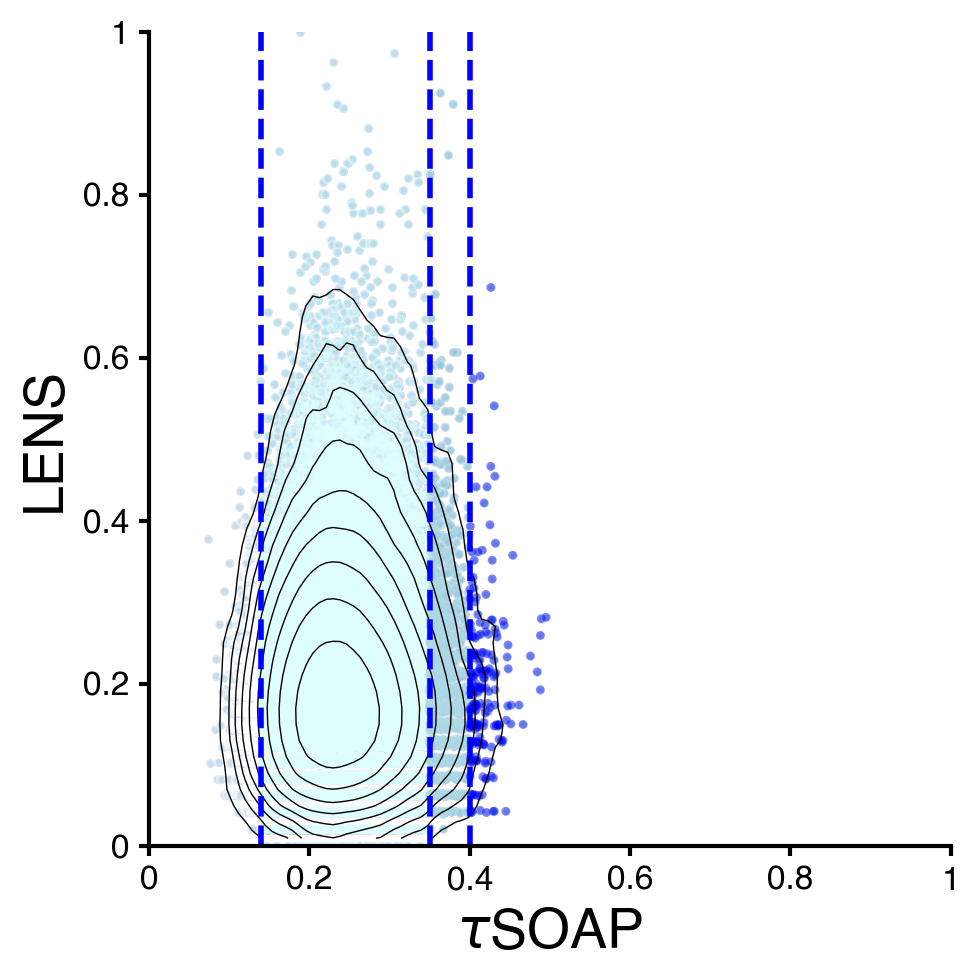

In [89]:
_, ax = plt.subplots(1, figsize=(5,5), dpi=200, tight_layout=True)

ax.scatter(signal_joint_fl[:,0],signal_joint_fl[:,1], marker='.',s=40, edgecolors='snow', alpha=0.4)
lh, Xe, Ye, lhmin = getDensity(signal_joint_fl, 0, 1, 50)
levels = 9
cont = ax.contour(Xe,
    Ye,
    lh,
    colors="k",
    linewidths=0.5,
    levels=levels,
    antialiased=True,
    linestyles="solid",
    vmin=lhmin,
    vmax=0,
)


ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\tau$SOAP', weight='bold',size=20)
ax.set_ylabel('LENS', weight='bold',size=20)

ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

for side in ['right','top']:
    ax.spines[side].set_visible(False)
for side in ['bottom','right','top','left']:
    ax.spines[side].set_linewidth(1.5)
    
    
ax.tick_params(
axis='both',          # changes apply to the x-axis
which='major',      # both major and minor ticks are affected
bottom=True,
left=True,      
labelleft=True,
labelbottom=True,
width=1.5,
labelsize=12,
)     


ax.axvline(x=0.14, c="blue", linewidth=2, linestyle="--")
ax.axvline(x=0.35, c="blue", linewidth=2, linestyle="--")
ax.axvline(x=0.40, c="blue", linewidth=2, linestyle="--")

    

# ax.scatter(signal_joint_fl[i,0],signal_joint_fl[i,1], c='red', marker='.', s=40, edgecolors='none', alpha=0.4)
tmp = np.where(signal_joint_fl[:, 0] <= 0.14)
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='white', marker='.', s=40, edgecolors='none', alpha=0.4)

tmp = np.where(np.logical_and(signal_joint_fl[:, 0] > 0.14, signal_joint_fl[:, 0] <= 0.35))
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='lightcyan', marker='.', s=40, edgecolors='none', alpha=0.4)


tmp = np.where(np.logical_and(signal_joint_fl[:, 0] > 0.35, signal_joint_fl[:, 0] <= 0.40))
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='lightblue', marker='.', s=40, edgecolors='none', alpha=0.4)

tmp = np.where(signal_joint_fl[:, 0] > 0.4)
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='blue', marker='.', s=40, edgecolors='none', alpha=0.4)





/tmp/ipykernel_17080/2531458372.py:4: RuntimeWarning: divide by zero encountered in log
  lh = np.log(h)
/tmp/ipykernel_17080/3944232114.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
/tmp/ipykernel_17080/3944232114.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])


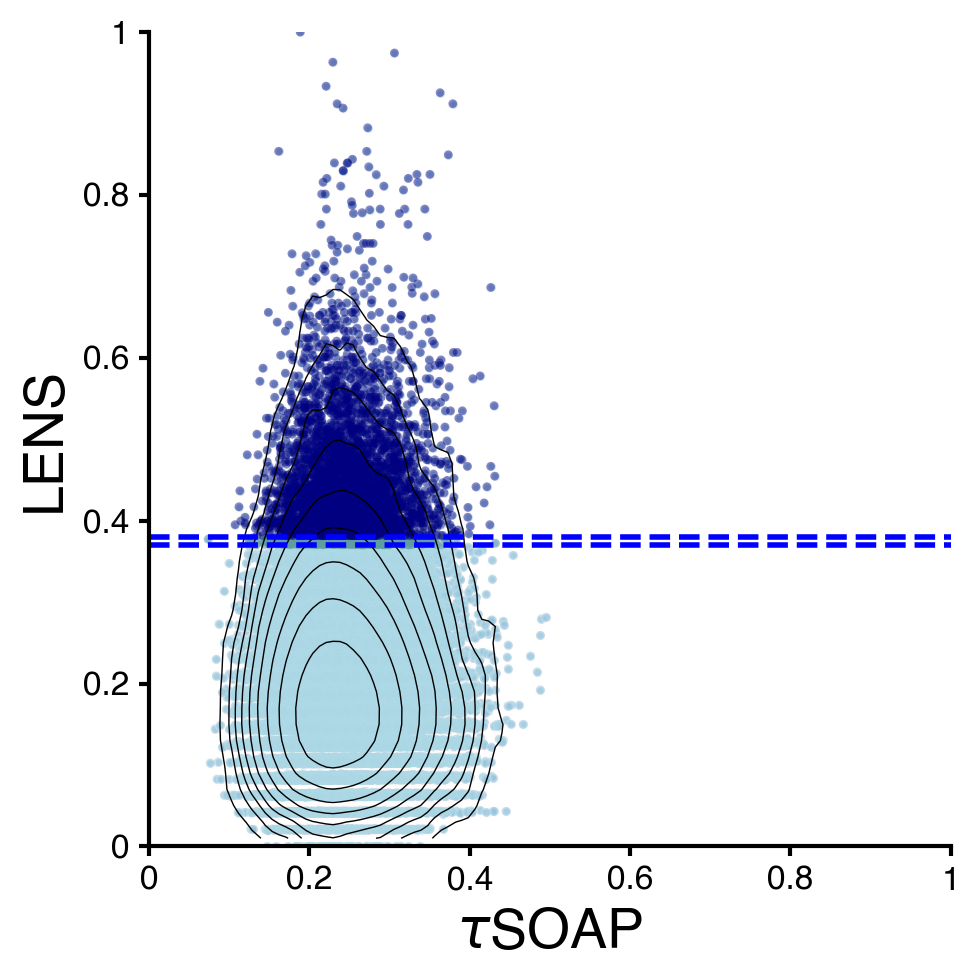

In [87]:
_, ax = plt.subplots(1, figsize=(5,5), dpi=200, tight_layout=True)

ax.scatter(signal_joint_fl[:,0],signal_joint_fl[:,1], marker='.',s=40, edgecolors='snow', alpha=0.4)
lh, Xe, Ye, lhmin = getDensity(signal_joint_fl, 0, 1, 50)
levels = 9
cont = ax.contour(Xe,
    Ye,
    lh,
    colors="k",
    linewidths=0.5,
    levels=levels,
    antialiased=True,
    linestyles="solid",
    vmin=lhmin,
    vmax=0,
)


ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\tau$SOAP', weight='bold',size=20)
ax.set_ylabel('LENS', weight='bold',size=20)

ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

for side in ['right','top']:
    ax.spines[side].set_visible(False)
for side in ['bottom','right','top','left']:
    ax.spines[side].set_linewidth(1.5)
    
    
ax.tick_params(
axis='both',          # changes apply to the x-axis
which='major',      # both major and minor ticks are affected
bottom=True,
left=True,      
labelleft=True,
labelbottom=True,
width=1.5,
labelsize=12,
)     


ax.axhline(y=0.37, c="blue", linewidth=2, linestyle="--")
ax.axhline(y=0.38, c="blue", linewidth=2, linestyle="--")

    

# ax.scatter(signal_joint_fl[i,0],signal_joint_fl[i,1], c='red', marker='.', s=40, edgecolors='none', alpha=0.4)
tmp = np.where(signal_joint_fl[:, 1] <= 0.37)
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='lightblue', marker='.', s=40, edgecolors='none', alpha=0.4)

tmp = np.where(np.logical_and(signal_joint_fl[:, 1] > 0.37, signal_joint_fl[:, 1] <= 0.38))
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='cadetblue', marker='.', s=40, edgecolors='none', alpha=0.4)

tmp = np.where(signal_joint_fl[:, 1] > 0.38)
ax.scatter(signal_joint_fl[tmp, 0], signal_joint_fl[tmp, 1], c='navy', marker='.', s=40, edgecolors='none', alpha=0.4)

